0.	 Date (DD/MM/YYYY) 
1.	Time (HH.MM.SS)
2.	True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3.	PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4.	True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5.	True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
6.	PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 
7.	True hourly averaged NOx concentration in ppb (reference analyzer) 
8.	PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9.	True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 

10.	PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 
11.	 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
12.	 Temperature in °C 
13.	 Relative Humidity (%) 
14.	 AH Absolute Humidity


The objective is to predict the Relative Humidity at a given point of time based on all other attributes affecting the change in RH.

Import Libraries

In [5]:
import pandas as pd  #Data processing library
import numpy as np #Numpy is a linear algebra Library
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #data visualization library

In [6]:
%matplotlib inline #import matplot library inline to see the graphs in the jupyter notebook

UsageError: unrecognized arguments: #import matplot library inline to see the graphs in the jupyter notebook


Explore The Data

In [7]:
df = pd.read_csv('AirQualityUCI.csv') #with the help of pandas library, read the csv file present in the "AirQualityUCI" file 
#and store it in a variable called df

In [8]:
df.head() #to see the first 5 rows of the data set 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [9]:
#by seeing the head of the data set we can infer that there are 15 columns. and there are 2 empty columns - Unnamed15 and unnamed 16

In [10]:
df.columns # to see the names of the columns of the data set

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [11]:
df.info() #to see the number of rows and columns in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [13]:
df.describe()#to get the statistical description of the data set

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [12]:
#from this we can infer that there are 9471 total entries in the data set.
#there are a total of 17 columns
#there are 15 columns columns of type float and 2 columns - date and time which are of object type

In [14]:
df.drop(['Unnamed: 15', 'Unnamed: 16'],axis=1,inplace = True)#we drop the 2 axis unnamed 15 and 16, axis =1 because
#we are dropping column wise, inplace = true - because we want the changes to be reflected in the main data frame.

In [15]:
df.head()# we check the head of the data again to make sure the changes are applied

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Get rid of NAN values

In [16]:
#we are trying to see if there are any null values in the data set by plotting a heat map

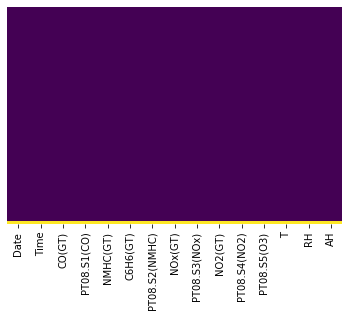

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #heat map plot to check presece of any NAN values

In [18]:
#from the above heat map we can see that, there are some NAN values. The ones indicated in yello- are the NAN values. 
#the purple are in the non-NAN values

In [19]:
df.dropna(axis=0,inplace=True) #Drop all the rows containing NAN values
#axis is mentioned to be 0 because, we want to get rid off those rows which have NAN values and not the entire column

In [20]:
#after dropping the NAN values, we plot a heatmap again to make sure that there are no NAN values left.

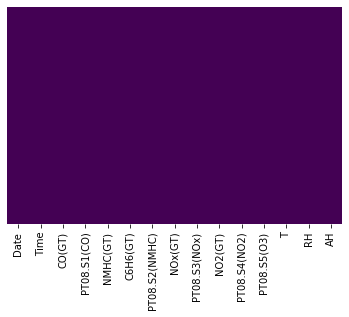

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#from the above plotted heat map we can see that the entire place is purple indicating that there are no NAN values present in the data set

Pair Plot to analyze the data

In [ ]:
#here we are trying to plot a heatmap of all the features of the data set
#Now we will see the correlation between the data set and try to understand the insight 

In [33]:
corr = df.corr()
corr

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


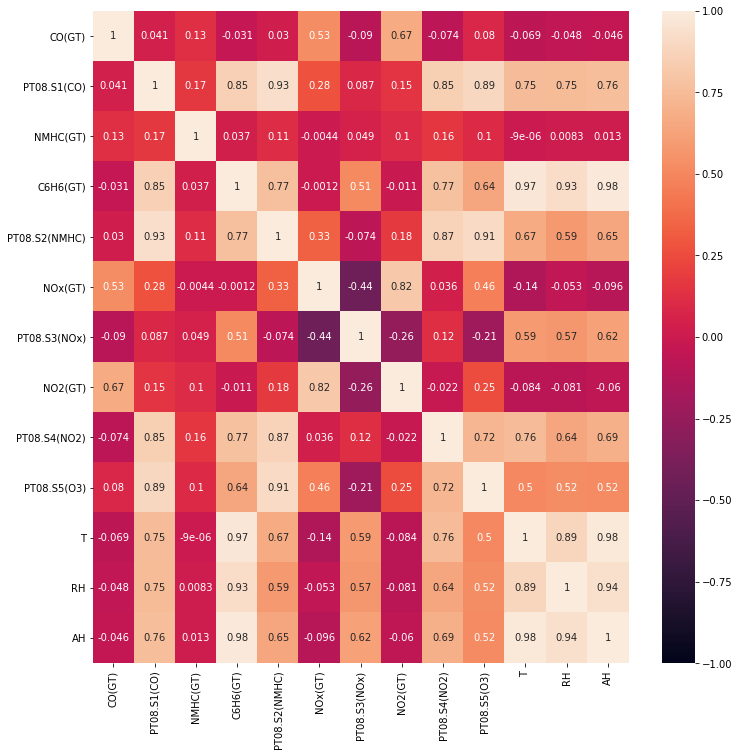

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmin=-1, vmax=1,annot=True)

from this correlation it's clear that how the RH is changing according to the other features

Absolute Humidity  has the highest correlation with RH, followed by C6H6,PT08.S1, and the temperature

In [24]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

Let's drop the Date, Time columns as they are not giving much information about the data set

Let's seperate the features from the target in this step
we have 11 features and 1 target value -RH

In [37]:
X = df.drop(['Date','Time','RH'],axis=1) #to select the features and target
y=df['RH']

Let's choose a  regression model to train the data set
From the pairplots plotted, we can infer that the value of RH is linearly varying with the feature values
and since the target value is not categorical but, linear
let's choose linear regression model and train the data set

Training a Linear Regression Model

train test split is imported to divide the data set into test data and train data
The model is first trained with the train data set
and then it is made to predict with the test data set
so we can understand the performance of the model

In [38]:
from sklearn.model_selection import train_test_split#from sk learn import train test split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3)#here the size is set to 0.3 which means
#that the test data set is 30% of the entire data set
#the model is first trained with the 70% of the data with the help of train and the rest of the 30% is tested for the performace

In [41]:
#inferred from earlier, we are going to choose Linear regression because the tearget is varying linearly with the feature values

In [40]:
from sklearn.linear_model import LinearRegression#import linear regression from sklearn

In [42]:
lr = LinearRegression()#create an instance of the linear regression as lr

In [43]:
lr.fit(X_train,y_train)#with the help of fit method from linear regression we try to fit the data by providing the train data set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
pred = lr.predict(X_test)#with the help of predict method we try to predict the values of the test data set

In [45]:
sns.set_style('whitegrid')

Lets look at a plot of the difference between the predicted and the actual values 

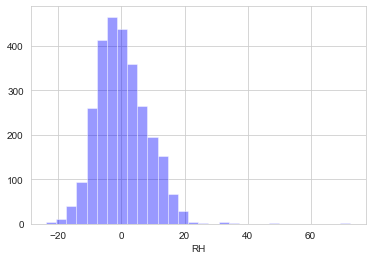

In [46]:
sns.distplot((y_test-pred),kde=False,bins=30,color='blue') #distribution plot of the difference between the predicted and he actual value

from this we can infer that the data is distributed normally from the center\
which gives us a confirmation of the regression model that we have used

Lets check the coefficients of the features of the data set to see how the features are affecting the RH target value

In [56]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
CO(GT),0.006065
PT08.S1(CO),0.010254
NMHC(GT),-0.016076
C6H6(GT),-1.190120
PT08.S2(NMHC),-0.046545
NOx(GT),0.029670
PT08.S3(NOx),-0.020870
NO2(GT),-0.050560
PT08.S4(NO2),0.058039
PT08.S5(O3),-0.001032


from this we can infer that the columns - CO,PT08.S1,NMHC,PTO8.S are the least affecting features 
We could essentially drop these features and not get any significant changes in the behaviour of the model\
whereas, Temperature,AH,C6H6N02 are influencing RH to a great extent relatively

Let's find mean absolute error, mean squared error as well as root mean squared error of the model created

In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 6.273473338306517
MSE: 62.90910868532804
RMSE: 7.931526251947228


From the RMSE value we can infer that the model created is giving a relatively good performance